In [1]:
import glob
import pandas as pd

path ='/Users/ryanpurcell/Desktop/LendingClub Combined Data/' # use your path
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0,usecols=[*range(0,50)], encoding = "ISO-8859-1", low_memory = False,skiprows=[0])
    list_.append(df)
df= pd.concat(list_)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466352 entries, 0 to 42537
Data columns (total 50 columns):
id                            7 non-null object
member_id                     0 non-null float64
loan_amnt                     466345 non-null float64
funded_amnt                   466345 non-null float64
funded_amnt_inv               466345 non-null float64
term                          466345 non-null object
int_rate                      466345 non-null object
installment                   466345 non-null float64
grade                         466345 non-null object
sub_grade                     466345 non-null object
emp_title                     438746 non-null object
emp_length                    445327 non-null object
home_ownership                466345 non-null object
annual_inc                    466341 non-null float64
verification_status           466345 non-null object
issue_d                       466345 non-null object
loan_status                   466345 non-null 

In [105]:
from datetime import datetime, timedelta

df['A'] = pd.to_datetime(df['last_pymnt_d'])
df['A'].dtypes

dtype('<M8[ns]')

In [106]:
df['B'] = pd.to_datetime(df['issue_d'])
df['B'].dtypes

dtype('<M8[ns]')

In [107]:
df['Difference'] = df['A'] - df['B']

In [108]:
datefilter=df['Difference']<timedelta(days=180)

In [110]:
#chargoff % within 180 days. Example 50% within 180 days.
df[datefilter].groupby('grade')['funded_amnt'].count()

grade
A    2901
B    5818
C    6661
D    4899
E    2645
F    1229
G     334
Name: funded_amnt, dtype: int64

In [2]:
#GRADE by FUNDED AMNT
a2=(df.pivot_table(index='grade',values='funded_amnt',aggfunc=sum)/df.pivot_table(index='grade',values='funded_amnt',aggfunc=sum).sum()).round(2)
c2=a2.reset_index().sort_values('funded_amnt',ascending=False)
d2=c2['grade']
b2=c2['funded_amnt']
print(list(d2))
print(list(b2))

['B', 'C', 'D', 'A', 'E', 'F', 'G']
[0.27, 0.27, 0.17, 0.15, 0.09, 0.04, 0.01]


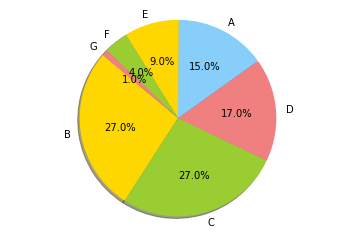

In [3]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = list(d2)
sizes = list(b2)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [4]:
#Charge Off Probability
Total=df.groupby(['grade'])['funded_amnt'].count()
df1=df[(df.loan_status=='Charged Off')]
df2=df1.groupby(['grade'])['funded_amnt'].count()
df3=(df2/Total).round(2)
df4=df3.reset_index()
df4=df4.sort_values(by=['funded_amnt'],ascending = False)
purpose = df4['grade']
CO=df4['funded_amnt']
df4
#find out how to name the columns
#sort by default

,grade,funded_amnt
6,G,0.35
5,F,0.33
4,E,0.28
3,D,0.22
2,C,0.17
1,B,0.11
0,A,0.05


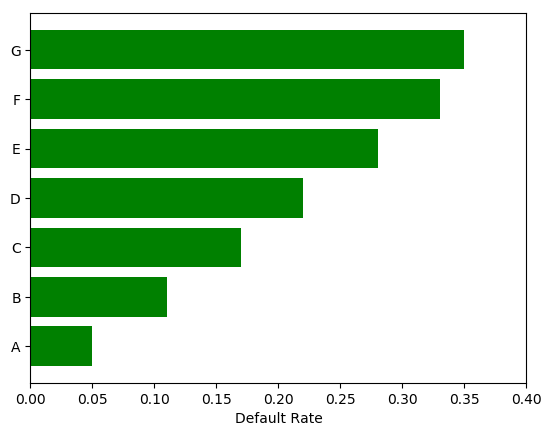

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
#np.random.seed(19680801)

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = purpose
y_pos = np.arange(len(people))
performance = CO
error = np.random.rand(len(people))

ax.barh(y_pos, performance, color = 'green', )#xerr=error, align='center')
        #color='green',ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Default Rate')
#ax.set_title('Default Rate by Grade')
ax.set_xlim(0,.4)

plt.show()